# Melbourne Housing Market

Melbourne housing clearance data from Jan 2016

# 01 - Linear Regression

Link: https://www.kaggle.com/anthonypino/melbourne-housing-market?select=Melbourne_housing_FULL.csv

1. When did the Melbourne housing cooled off?
2. Could you see it slowing down? What were the variables that showed the slowing down (was it overall price, amount sold vs unsold, change in more rentals sold and less housing, changes in which CouncilArea or Region, more houses sold in distances further away from Melbourne CBD and less closer)? 
3. Could you have predicted it?
4. Should I hold off even longer in buying a two bedroom apartment in Northcote??

Summary

In this notebook, I will be using only linear regression to model price with the various variables to determine if the model is able to predict price changes. This notebook is copied and adapted from https://www.kaggle.com/anthonypino/price-analysis-and-linear-regression. 

Based on the model, the R^2 is ____. I included a feature selection process - Correlation Statistics and Mutual Information Statistics - to determine the best number of variables that could improve the model. 

The main components of this notebook can be split into:

1. Data Cleaning
2. Data Exploration
3. Data Modelling using Linear Regression with all the variables
4. Feature Selection using Correlation Statistics
5. Feature Selection using Mutual Information Statistics.
6. 10-Fold Cross Validation to tune the number of Selected Features
7. Model Evaluation using MAE, MSE and RMSE


### Some Key Details
Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

#### Method:
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

#### Type:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

In [1]:
## Import libraries

# Data wrangling
import pandas as pd
import numpy as np
from datetime import date # Usage: Determine days from start

# Data Visualisations
%matplotlib inline
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns

# Model Development and Evaluation
from sklearn.model_selection import train_test_split # For Model Development
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [3]:
# Reading source files

# df_houseprice = pd.read_csv("data/MELBOURNE_HOUSE_PRICES_LESS.csv")
df_housingfull= pd.read_csv("data/Melbourne_housing_FULL.csv")

## Part 1 - Data Cleaning

1. Convert arguments in Date column to datetime
2. Filter out data that are not housing types

I will only be focusing on housing data.

In [4]:
# Data Cleaning
df_housingfull = df_housingfull.rename(columns={'Lattitude':'Latitude'}) # Rename column names

# Remove unrelevant column data
df_housingfull = df_housingfull.drop(['Suburb', 'Address', 'SellerG','Regionname', 'CouncilArea'],axis=1)

# Convert date column to datetime
df_housingfull['Date'] = pd.to_datetime(df_housingfull['Date'],dayfirst=True)
print("There are {} rows and {} columns in this dataframe" .format(df_housingfull.shape[0],df_housingfull.shape[1]))

# Create new dataframe with only housing data
df = df_housingfull[df_housingfull['Type']=='h']
print("After filtering data that are not housing types, there are {} rows and {} columns in this new dataframe" .format(df.shape[0],df.shape[1]))

There are 34857 rows and 16 columns in this dataframe
After filtering data that are not housing types, there are 23980 rows and 16 columns in this new dataframe


## Part 2 - Data Exploration using Visualisations

1. Histogram plot for each variable
2. Pair plots 
3. Observe average price change per quarter over the years


Text(0.5, 1.0, 'Price vs Distance')

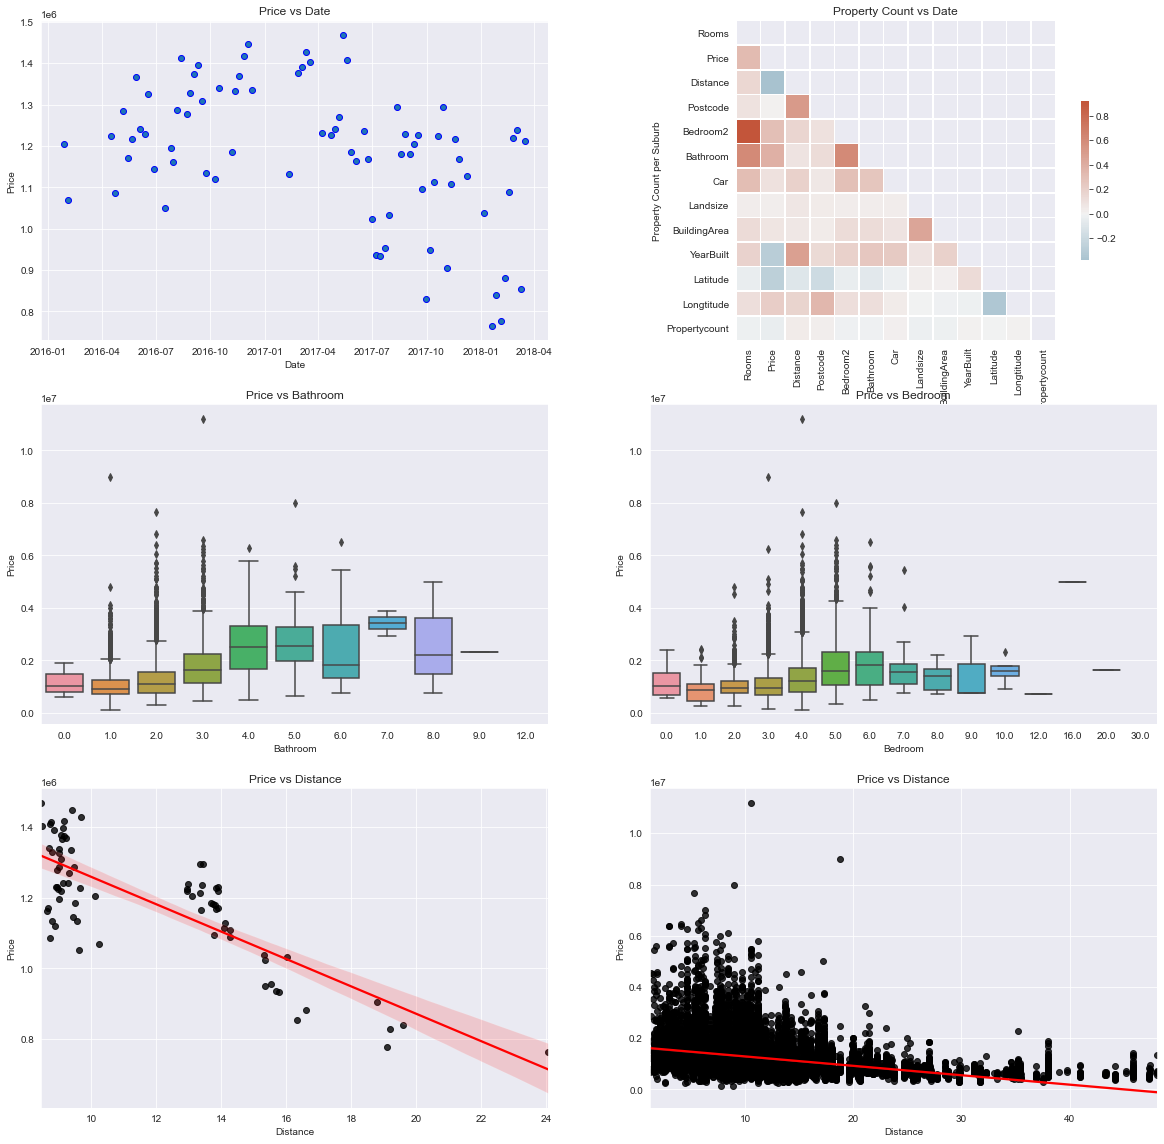

In [5]:
# Plot Relationships between price and features
sns.set_style( 'darkgrid' )
fig, axes = plt.subplots(3,2,figsize=[20,20])

# Plot 1: Scatterplot of AVerage Price against Date
mean_df = df.sort_values('Date',ascending=False).groupby('Date').mean().reset_index()
axes[0,0].scatter(x='Date',y='Price',data=mean_df,edgecolor='b' )
axes[0,0].set_xlabel( 'Date' )
axes[0,0].set_ylabel( 'Price' )
axes[0,0].set_title( 'Price vs Date')

# Plot 2: Diagonal Correlation Matrix 
# Compute the correlation matrix
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# # Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},ax=axes[0,1])
axes[0,1].set_xlabel('Date')
axes[0,1].set_ylabel('Property Count per Suburb')
axes[0,1].set_title('Property Count vs Date')

# Plot 3: Boxplot of Price against number of Bathrooms
sns.boxplot(x='Bathroom',y='Price',data=df ,ax=axes[1,0] )
axes[1,0].set_xlabel( 'Bathroom' )
axes[1,0].set_ylabel( 'Price' )
axes[1,0].set_title( 'Price vs Bathroom')

# Plot 4: Boxplot of Price against number of Bedrooms
sns.boxplot(x='Bedroom2',y='Price',data=df ,ax=axes[1,1] )
axes[1,1].set_xlabel( 'Bedroom' )
axes[1,1].set_ylabel( 'Price' )
axes[1,1].set_title( 'Price vs Bedroom')

# Plot 5: Regression plot of Average istance against Average Price
sns.regplot(x='Distance',y='Price',data=mean_df,scatter_kws={"color": "black"}, line_kws={"color": "red"},ax=axes[2,0])
axes[2,0].set_xlabel('Distance')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Price vs Distance')

# Plot 6: Regression plot of Distance against Price
sns.regplot(x='Distance',y='Price',data=df,scatter_kws={"color": "black"}, line_kws={"color": "red"},ax=axes[2,1])
axes[2,1].set_xlabel('Distance')
axes[2,1].set_ylabel('Price')
axes[2,1].set_title('Price vs Distance')


These visualisations can help to answer the first 2 questions:

1. The housing prices in Melbourne appears to begin cooling off sometime between April and July in 2017. 
2. Based on the correlation matrix, the top 2 features that affects pricing is the number of Bathrooms, nunber of Bedrooms and distance (kilometres) from CBD. I plotted boxplots to visualise how price varies the number of bedrooms and bathrooms. The boxplot for the number of bedrooms indicate that there's quite alot of variability. For distance, I used a regression plot to see how price varies. The plot shows a negative relationship between the two, which is logical since housing near CBD are usually priced higher than those in the outer regions.

## Part 3 - Linear Regression Model with all Features

In this part, I will evaluate the linear regression model using all the available features. The data is split into training and test data with a 2:1 ratio. The coefficient for each predictor variable is subsequently ranked after, showing that longitude, number of bathrooms and the vendor bid method as the top 3 most significant feature in the model. 



In [6]:
## Further data cleanup
# Remove missing values
df1 = df.dropna().sort_values('Date')

###########
##Find out days since start
days_since_start = [(x-df1['Date'].min()).days for x in df1['Date']]
df1['Days'] = days_since_start

# Convert Categorical Variables to dummy/indicator variables
df2_dummies = pd.get_dummies(df1[['Type','Method']])
df2 = df1.drop(['Type','Date','Method'],axis=1).join(df2_dummies)

# Determine x (independent variables or predictor variables) and y (dependent variables) 
y = df2['Price'] # Price being the dependent variable
x = df2.drop(['Price'],axis=1) # Remove price from the independent variables

# Split into training and test set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33)

# Fit the model
model = LinearRegression()
model.fit(x_train,y_train)

# Evalute the model
ypredictions = model.predict(x_test)

# Ranking the coefficients
coeff_df = pd.DataFrame(model.coef_,x.columns,columns=['Coefficient'])
ranked_coeff = coeff_df.sort_values("Coefficient", ascending = False)
print(ranked_coeff)

                Coefficient
Longtitude     5.404310e+05
Bathroom       2.050054e+05
Rooms          8.073899e+04
Car            5.194845e+04
Method_VB      4.878232e+04
Method_S       3.758929e+04
Bedroom2       3.111879e+04
BuildingArea   1.683848e+03
Method_PI      1.355322e+03
Postcode       1.044804e+03
Days           1.491648e+02
Landsize       6.700705e+01
Propertycount  1.272204e+00
Type_h         1.164153e-10
YearBuilt     -3.213159e+03
Method_SP     -3.698939e+04
Method_SA     -5.073755e+04
Distance      -5.161010e+04
Latitude      -1.537221e+06


### Scatter Plot of Actual vs Predicted



Text(0.5, 1.0, 'Observed vs Predicted')

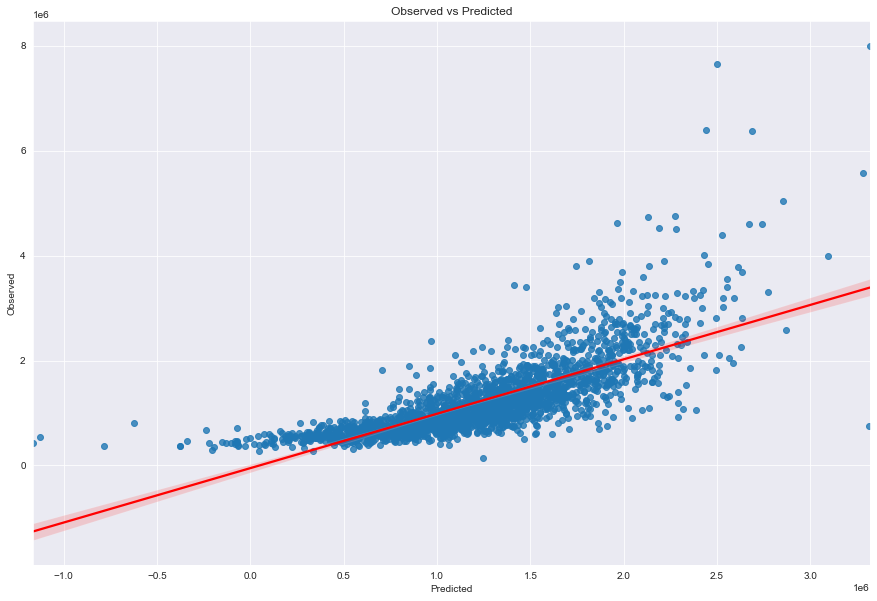

In [11]:
fig_lm,axes_lm = plt.subplots(1,1,figsize=[15,10]) # Create a custom size figure

# # ax1 = fig_lm.add_subplot() # Add subplot
sns.regplot(x=ypredictions,y=y_test,line_kws={"color":"red"},ax=axes_lm)
axes_lm.set_xlabel("Predicted") # Add x label
axes_lm.set_ylabel("Observed") # Add y label
axes_lm.set_title("Observed vs Predicted")

### Distribution plot: difference in actual price and predicted price

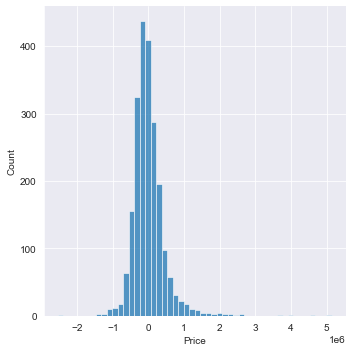

In [8]:
sns.displot(data=(y_test-ypredictions),bins=50)


### Evaluating the Raw Linear Regression model

In [10]:
print("------Evaluated predictions for a raw Linear Regression Model------")
print("MAE: ", metrics.mean_absolute_error(y_test,ypredictions))
print("MSE: ", metrics.mean_squared_error(y_test,ypredictions))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,ypredictions)))
print("R^2 ", metrics.r2_score(y_test,ypredictions))

------Evaluated predictions for a raw Linear Regression Model------
MAE:  303135.5223904289
MSE:  211634647505.68866
RMSE:  460037.6587907654
R^2  0.5857898755940139
